In [35]:
from sklearnex import patch_sklearn
patch_sklearn(global_patch=True)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shap import plots, Explanation
import shap
from scipy.spatial import distance
import pickle
import glob

pd.set_option('display.max_columns', None)

Scikit-learn was successfully globally patched by Intel(R) Extension for Scikit-learn


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [64]:
exp_list = []

# Define the pattern to match the file names
file_pattern = '100-exp-dt/exp_k_*.pkl'

# Retrieve the list of file paths matching the pattern
file_paths = glob.glob(file_pattern)

for file_path in file_paths:
    with open(file_path, 'rb') as handle:
        exp_list.append(pickle.load(handle))
        # Do something with the loaded data from the pickle file
        # For example, you can process or analyze 'exp' data here

In [44]:
x_features = [    
    "flow_duration", "fwd_pkts_tot", "bwd_pkts_tot",
    "fwd_data_pkts_tot", "bwd_data_pkts_tot", "fwd_pkts_per_sec", "bwd_pkts_per_sec", "flow_pkts_per_sec",
    "down_up_ratio", "fwd_header_size_tot", "fwd_header_size_min", "fwd_header_size_max",
    "bwd_header_size_tot", "bwd_header_size_min", "bwd_header_size_max", "flow_FIN_flag_count",
    "flow_SYN_flag_count", "flow_RST_flag_count", "fwd_PSH_flag_count", "bwd_PSH_flag_count", "flow_ACK_flag_count",
    "fwd_URG_flag_count", "bwd_URG_flag_count", "flow_CWR_flag_count", "flow_ECE_flag_count",
    "fwd_pkts_payload.min", "fwd_pkts_payload.max", "fwd_pkts_payload.tot", "fwd_pkts_payload.avg",
    "fwd_pkts_payload.std", "bwd_pkts_payload.min", "bwd_pkts_payload.max", "bwd_pkts_payload.tot",
    "bwd_pkts_payload.avg", "bwd_pkts_payload.std", "flow_pkts_payload.min", "flow_pkts_payload.max",
    "flow_pkts_payload.tot", "flow_pkts_payload.avg", "flow_pkts_payload.std", "fwd_iat.min",
    "fwd_iat.max", "fwd_iat.tot", "fwd_iat.avg", "fwd_iat.std", "bwd_iat.min", "bwd_iat.max",
    "bwd_iat.tot", "bwd_iat.avg", "bwd_iat.std", "flow_iat.min", "flow_iat.max", "flow_iat.tot",
    "flow_iat.avg", "flow_iat.std", "payload_bytes_per_second", "fwd_subflow_pkts", "bwd_subflow_pkts",
    "fwd_subflow_bytes", "bwd_subflow_bytes", "fwd_bulk_bytes", "bwd_bulk_bytes", "fwd_bulk_packets",
    "bwd_bulk_packets", "fwd_bulk_rate", "bwd_bulk_rate", "active.min", "active.max", "active.tot",
    "active.avg", "active.std", "idle.min", "idle.max", "idle.tot", "idle.avg", "idle.std",
    "fwd_init_window_size", "bwd_init_window_size", "fwd_last_window_size"
]

In [45]:
coef = pd.read_csv('lr_importance.csv', index_col=0)

In [65]:
linear_shap = pd.read_csv('dt_shap.csv', index_col=0)

In [60]:
for i in range(0,len(exp_list)):
    print(distance.cosine(coef['importance'],exp_list[i].mean(0).values))

0.6255015574660521
0.619508649899827
0.6247192876469239
0.6218253953907521
0.6041744972891785
0.6190067238006822
0.6165300079259692
0.6252099270991571
0.6263571824813109
0.618692649985532
0.6168917598054025
0.6226198437803253
0.6201183462961689
0.6163983614681499
0.6145242656265675
0.6236283720046587
0.620764105180801
0.6237439304335961
0.6199594848219123
0.6176016900952463
0.6117509266893002
0.6182392517410165
0.6261261046034257
0.6160861405335252
0.6287111332822576
0.6093959475333705
0.6223927144841883
0.6138500758697336
0.6303634909735488
0.6203585973260062
0.625659312287099
0.6161678228008007
0.6201929870609473
0.6161346843060209
0.6213356135685821
0.6177755216788373
0.6217291639708564
0.6208733350074738
0.6227962616477083
0.6160755854200408
0.6298161655978758
0.6233575222355942
0.627303095887483
0.619471610089782
0.6180179071933076
0.6260828611602915
0.6136566435475206
0.6293553652968094
0.6275837604960233
0.6029338274976954
0.6145037050475837
0.6278186292389042
0.6223050709254474

In [68]:
for i in range(0,len(exp_list)):
    print(distance.cosine(linear_shap['importance'],exp_list[i].mean(0).values))

0.7481497854830298
0.7317173836860302
0.7448125653790169
1.0080030921745828
0.7671291919033877
0.7336264022778487
0.7284111692218819
0.7276103493782895
0.7825972718544456
0.7635070095667356
0.7321959627267279
0.77626120409592
0.7176319075315978
0.7265035830413047
0.7506042280549418
0.7188517069484198
0.7628237159648716
0.7233896929675079
0.7371323578086046
0.7383817697224948
0.780769126950771
0.7828007474601975
0.7731426430825281
0.7208819912430893
0.7203021083101852
0.7901076713680565
0.7232272072146262
0.6976994892665596
0.7910820412015102
0.7254536384738046
0.7795453269589967
0.7294109213369724
0.7736898478368139
0.7220509991249522
0.7540493535421223
0.7275694234771493
0.8030592768823333
0.7271467028263585
0.7190685724884636
0.7320133819683947
0.7685576172628461
0.7261384991623995
0.7135737263609239
0.7890764215690672
0.7562916709888181
0.731645655266072
0.728115967804031
0.7320460476838114
0.7894620300981047
0.9747998789419289
0.7237373803775027
0.7704635250082317
0.820432763063490

In [66]:
def standard_scaler(array):
    scaled = []
    
    u = np.mean(array)
    s = np.std(array)
    for x in array:
        scaled.append((x - u) / s)
        
    return scaled

In [67]:
scaled_linear = standard_scaler(linear_shap['importance'])

for i in range(0,len(exp_list)):
    scaled_kernel = standard_scaler(exp_list[i].mean(0).values)
    print(distance.euclidean(scaled_linear,scaled_kernel))

10.842444481130334
10.722273731358529
10.81760306130981
12.613056740823245
10.986491420810959
10.735662556784808
10.69815607445818
10.690802973305809
11.09391661147579
10.954274845617945
10.727901770864287
11.046201250128824
10.61683289815219
10.683465725275374
10.861112659509592
10.628227290365912
10.948507493455613
10.659570756868193
10.762663684638628
10.772358317393838
11.077570113903974
11.095854253470058
11.023565250955063
10.642258194585375
10.637923590582098
11.149911743810945
10.658748685647362
10.469951725592363
11.151893180602622
10.676202073883701
11.068704325948307
10.705525361611585
11.028508897107345
10.651010896831032
10.883822982863009
10.695944640744983
11.239737957816441
10.68801120990951
10.628127115684132
10.72431956048957
10.99150508997632
10.6822730920153
10.587874980462708
11.137836213206931
10.910268409013993
10.721087030873578
10.695214167746238
10.728448957401774
11.14449246187686
12.399525961962897
10.664496089733367
11.005902977667455
11.363417307235883
10.

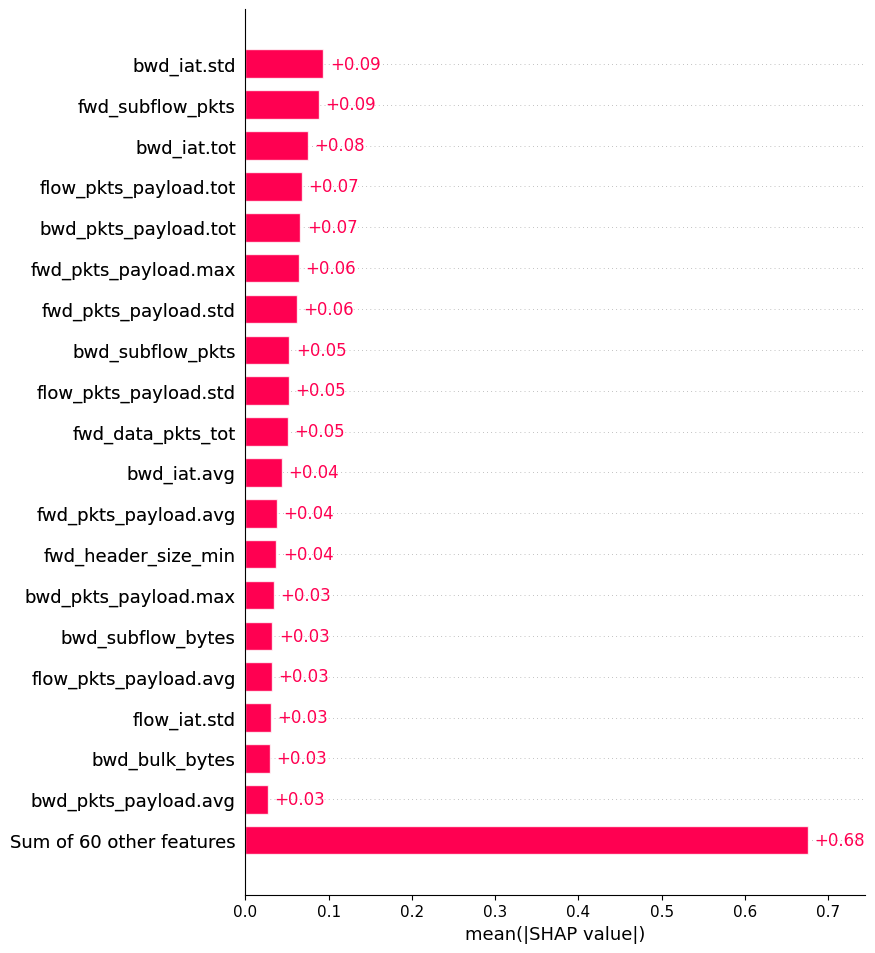

In [16]:
plots.bar(exp, max_display=20, show=False)


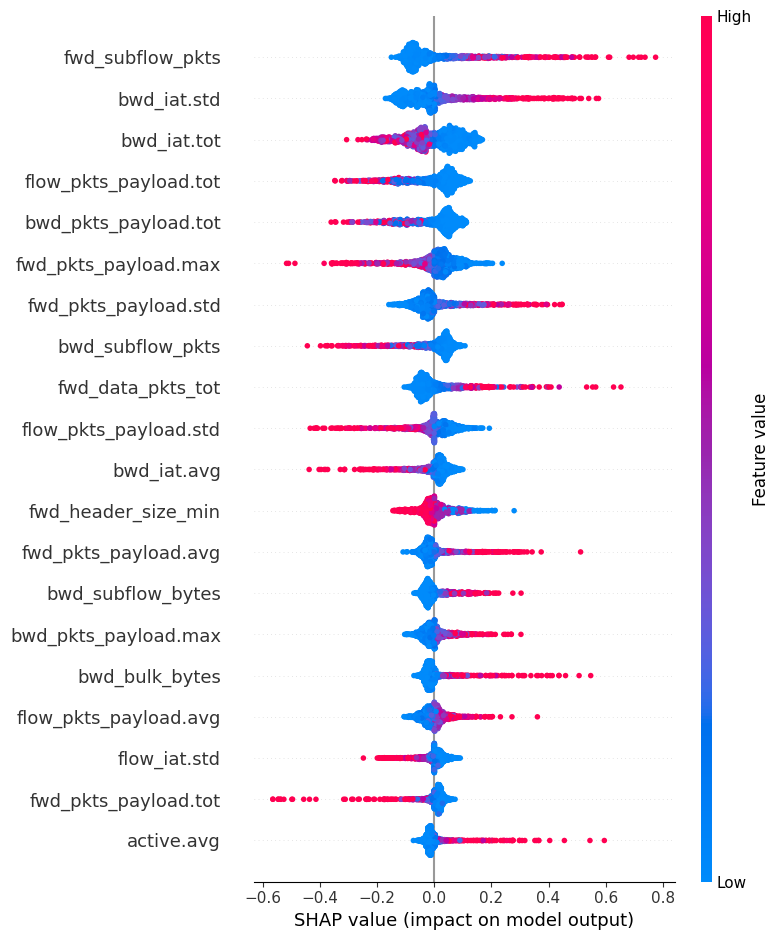

In [32]:
shap.summary_plot(exp, max_display=20)